<a href="https://colab.research.google.com/github/meriem-belkacemi/Machine-Learning-Notebooks/blob/main/TP_5_RN11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Ce TP a été réalisé par :

*   BELKACEMI Meriem
*   LABRI Ahlem
*   MAYOUF Lotfi









# TP 5 Réseaux de neurones - Multi classification et Propagation en avant
Dans ce TP, nous aimerions faire une classification multiclasse. Pour ce faire, nous allons comparer entre une classification utilisant la regression logistique, et une classification en utilisant les réseaux de neurones.

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

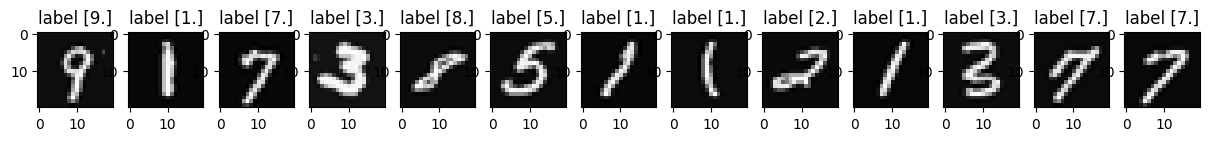

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

# Partie 1, régression logistique
Dans cette partie, nous aimerions utiliser la régression logistique pour classifier nos images

Rappelons que la régression logistique nous donne la probabilité d'appartenance (oui ou non) à la classe 1 (elle permet une classification binaire).

Pour étendre la régression logistique à une multi-classification, nous allons utiliser une stratégie 1 contre tous.

Nous paramètres $\theta$ seront donc une matrice avec un nombre de lignes égale au nombre de classes, et avec un nombre de colones égale au nombre decaractéristiques (chaque ligne de la matrice $\theta$ correspond aux paramètres d'un classifieur.

In [ ]:
def Sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def lrCostFunction (X, y, initial_theta, alpha, MaxIter,lambda_):
    # dans cette fonction vous devez appliquer la regression logistique avec tout ce que ceci implique
    # calcul du coût, minimisation du coût avec descente du gradient, et retour des paramètres theta pour une classe
    theta = np.array(initial_theta, copy=True)
    X_T = X.T
    m = X.shape[0]

    for i in range(MaxIter):
        y_hat = Sigmoid(X @ theta)
        error = y_hat - y
        grad = X_T @ error / m
        theta[0] -= alpha * grad[0]
        theta[1:] *= 1 - alpha * lambda_ / m
        theta[1:] -= alpha * grad[1:]
    return theta.T


In [ ]:
def predictOneVsAll (all_theta, X):
    # ici en utilisant les paramètres calculés par la régression logisitique,
    # nous aiemrions retourner les etiquettes predites

    # Ici chaque classifieur retournera de probabilité, il faudra choisir
    # la probabilité maximale
    # de tous les classifieurs d'une exemple donné
    # répeter pour tous les exmemples

    y_pred = np.argmax(Sigmoid(X @ all_theta.T), axis=1)

    return classes[y_pred[..., np.newaxis]]

In [ ]:
classes= np.unique(y)
number_classes=classes.shape[0]
all_theta = np.zeros((number_classes, X.shape[1]));
all_theta.shape

(10, 401)

In [ ]:
MaxIter= 10000
lambda_= 0.1
alpha = 0.01
# initial_theta pour chaque classifieur
initial_theta=np.zeros((X.shape[1], 1));
for i in range (number_classes):
     # appel pour chaque classifieur
     theta = lrCostFunction(X,(y==classes[i]).astype(int),initial_theta,alpha, MaxIter,lambda_);
     all_theta[i,:]=theta;

In [ ]:
y_pred = predictOneVsAll(all_theta, X);

# Qualité du classifieur RL

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [ ]:
precision = np.mean(y==y_pred)*100
precision


89.92

# Partie 2: Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [ ]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [ ]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [ ]:
input_layer_size  = 400;
hidden_layer_size = 25;
num_labels = 10;

**Prédiction**

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def predict (W1, W2, X):

    """
    Arguments:
    W1 -- matrice de poids pour la première couche, de forme (taille_couches_cachées, taille_couche_d'entrée + 1)
    W2 -- matrice de poids pour la deuxième couche, de forme (nombre_d'étiquettes, taille_couches_cachées + 1)
    X -- données d'entrée, de forme (nombre_d'échantillons, taille_couche_d'entrée)

    Renvoie:
    y_pred -- étiquettes de classe prédites, de forme (nombre_d'échantillons, 1)
    """

    # Calculer la sortie de la première couche cachée
    layer1_output = sigmoid(X @ W1.T)

    # Ajouter un biais à la sortie de la première couche cachée
    layer2_input = np.column_stack((np.ones((X.shape[0], 1)), layer1_output))

    # Calculer la sortie de la deuxième couche cachée
    layer2_output = sigmoid(layer2_input @ W2.T)

    # Prédire les étiquettes de classe en choisissant la sortie avec la valeur maximale
    y_pred = np.argmax(layer2_output, axis=1).reshape(-1, 1)

    # Convertir les étiquettes de classe prédites de 1 à 10 en 0 à 9 (pour correspondre à l'index de la sortie de la couche de sortie)
    y_pred = (y_pred + 1) % 10

    return y_pred

In [ ]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(W1,W2,X)
precision = np.mean(y==y_pred)*100
precision

97.52

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.neural_network import MLPClassifier

def compareRN(X,y,W1,W2):
    clf = MLPClassifier(hidden_layer_sizes=(25,), activation='logistic', solver='sgd',alpha=0.01, batch_size=32)
    clf.fit(X, y.ravel())

    # calculer la précision de notre implémentation sur l'ensemble d'apprentissage
    y_pred = predict(W1, W2, X)
    accuracy_train = np.mean(y_pred == y) * 100
    print("Accuracy on training set (custom implementation):", accuracy_train)

    # calculer la précision de scikit-learn sur l'ensemble d'apprentissage
    accuracy_sklearn = clf.score(X, y) * 100
    print("Accuracy on training set (scikit-learn implementation):", accuracy_sklearn)



In [ ]:
from sklearn.linear_model import LogisticRegression


def compareLR():
   model = LogisticRegression(penalty="l2", max_iter=10000, multi_class='ovr')
   model.fit(X[:, 1:], y.squeeze())
   y_prob = model.predict_proba(X[:, 1:])
   y_pred = np.argmax(y_prob, axis=1)[..., np.newaxis]
   print(f"Our logistic regression : {precision}")
   print(f"Sklearn logistic regression : {np.mean(y_pred==y)*100}")


In [ ]:
compareRN(X,y,W1,W2)

Accuracy on training set (custom implementation): 97.52
Accuracy on training set (scikit-learn implementation): 92.67999999999999


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred = predictOneVsAll(all_theta, X);
precision = np.mean(y==y_pred)*100

In [ ]:
compareLR()

Our logistic regression : 89.92
Sklearn logistic regression : 94.46


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

On s'intéresse dans cette partie au renforcement de l'apprentissage du modèle de regréssion logistique conçu dans la première partie, vu que le modèle des réseaux de neurones sera complété dans le TP6.

Afin d'améliorer l'apprentissage, on peut penser à faire une cross validation qui nous permet de trouver le meilleur parametre lambda pour effectuer la régularisation.
On teste alors cette dernière ci-dessous sur le modèle logistic regression de Sklearn et on constate que la precision augmente.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les valeurs de paramètre de régularisation (lambda) à tester à travers la recherche en grille (grid search)
param_grid = {'C': [0.1, 0.2, 0.4, 0.6, 0.8, 1]}

# Créer une instance de la classe LogisticRegression
logreg = LogisticRegression(penalty="l2", max_iter=10000, multi_class='ovr')

# Créer un objet GridSearchCV pour faire la recherche en grille et ajuster les hyperparamètres du modèle sur les données d'apprentissage
# Ici, on utilise la validation croisée à 10 plis (10-fold cross-validation) pour évaluer chaque combinaison de paramètres
grid_search = GridSearchCV(logreg, param_grid, cv=10)
grid_search.fit(X_train, y_train)



In [ ]:
print("Best lambda:", grid_search.best_params_['C'])

Best lambda: 0.8


On refait l'apprentissage avec ce nouveau parametre lambda :

In [ ]:
model = LogisticRegression(penalty="l2", max_iter=10000, C=1/0.8, multi_class='ovr')
model.fit(X[:, 1:], y.squeeze())
y_prob = model.predict_proba(X[:, 1:])
y_pred = np.argmax(y_prob, axis=1)[..., np.newaxis]
print(f"Sklearn logistic regression : {np.mean(y_pred==y)*100}")

Sklearn logistic regression : 94.6


Le résultat est meilleur que le précédant

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 22 Avril 2022 à 22h


In [ ]:
# bonne chance